<a href="https://colab.research.google.com/github/JVMA0111/Data_Science_Projects/blob/main/Analise_de_dados_corrida.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Análise de dados de corrida

A corrida, além de acessível, oferece diversos benefícios à saúde física e mental. Alguns deles são:
- Manutenção do humor
- Bem estar físico e mental
- Melhora em indicadores de saúde
- Aumento do VO2 Máximo (indicador que se correlaciona ao nível de funcionamento cardiovascular)

Ademais, há fortes evidências científicas que demonstram a correlação entre melhores níveis de VO2 máximo e longevidade (https://peterattiamd.com/how-does-vo2-max-correlate-with-longevity/).

Tendo em vista todo o contexto e importância da prática, foi feita uma análise dos dados captados em um smartwatch de um corredor (obtido em https://www.kaggle.com/datasets/jeffreybraun/running-log-insight). Nesta, buscou-se identificar padrões nos hábitos de treino, análisar a performance e queima de calorias.

In [60]:
import pandas as pd
df = pd.read_csv("activity_log.csv")
df

,Activity Type,Date,Title,Distance,Calories,Time,Avg HR,Max HR,Avg Run Cadence,Max Run Cadence,Avg Pace,Best Pace,Elev Gain,Elev Loss,Avg Stride Length,Best Lap Time,Number of Laps
0,Running,7/15/20 9:41,Cherry Hill Running,6.00,530,0:43:55,141,160,176,182,7:19,6:20,169,173,1.26,00:02.3,7
1,Running,7/14/20 17:45,Cherry Hill Running,6.50,587,0:47:04,144,160,172,182,7:14,6:35,183,187,1.29,03:32.7,7
2,Running,7/13/20 18:57,Cherry Hill Running,5.01,392,0:40:29,128,151,170,180,8:05,5:49,124,124,1.17,00:04.1,6
3,Running,7/12/20 18:44,Cherry Hill Running,7.01,633,0:52:55,142,157,172,180,7:33,5:00,215,219,1.24,00:05.1,8
4,Running,7/11/20 19:35,Cherry Hill Running,5.19,419,0:41:35,129,143,170,178,8:01,6:48,76,80,1.18,01:27.1,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
684,Running,6/3/18 18:09,Baltimore Running,7.96,808,0:55:33,170,184,170,182,6:59,4:34,669,679,1.35,00:00.0,8
685,Running,6/1/18 18:37,Baltimore Running,6.03,575,0:42:24,159,175,170,180,7:02,5:39,382,387,1.35,00:00.0,7
686,Running,5/31/18 18:37,Baltimore Running,5.98,566,0:45:17,149,175,168,246,7:34,6:05,322,322,1.27,00:00.0,6
687,Running,5/30/18 18:30,Baltimore Running,4.15,383,0:30:28,147,164,168,176,7:20,5:54,180,177,1.30,00:00.0,5


##Análise exploratória


#####Verificação de valores nulos

In [61]:
df.isna().sum()

Activity Type        0
Date                 0
Title                0
Distance             0
Calories             0
Time                 0
Avg HR               0
Max HR               0
Avg Run Cadence      0
Max Run Cadence      0
Avg Pace             0
Best Pace            0
Elev Gain            0
Elev Loss            0
Avg Stride Length    0
Best Lap Time        0
Number of Laps       0
dtype: int64

#####Eliminando colunas desnecessárias

In [62]:
df = df.drop(["Title", "Best Lap Time", "Number of Laps"], axis = 1)
df

,Activity Type,Date,Distance,Calories,Time,Avg HR,Max HR,Avg Run Cadence,Max Run Cadence,Avg Pace,Best Pace,Elev Gain,Elev Loss,Avg Stride Length
0,Running,7/15/20 9:41,6.00,530,0:43:55,141,160,176,182,7:19,6:20,169,173,1.26
1,Running,7/14/20 17:45,6.50,587,0:47:04,144,160,172,182,7:14,6:35,183,187,1.29
2,Running,7/13/20 18:57,5.01,392,0:40:29,128,151,170,180,8:05,5:49,124,124,1.17
3,Running,7/12/20 18:44,7.01,633,0:52:55,142,157,172,180,7:33,5:00,215,219,1.24
4,Running,7/11/20 19:35,5.19,419,0:41:35,129,143,170,178,8:01,6:48,76,80,1.18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
684,Running,6/3/18 18:09,7.96,808,0:55:33,170,184,170,182,6:59,4:34,669,679,1.35
685,Running,6/1/18 18:37,6.03,575,0:42:24,159,175,170,180,7:02,5:39,382,387,1.35
686,Running,5/31/18 18:37,5.98,566,0:45:17,149,175,168,246,7:34,6:05,322,322,1.27
687,Running,5/30/18 18:30,4.15,383,0:30:28,147,164,168,176,7:20,5:54,180,177,1.30


#####Descrição dos dados

In [63]:
df.describe()

,Distance,Avg Stride Length
count,689.000000,689.000000
mean,5.157489,1.277475
std,3.941417,0.337184
min,0.000000,0.000000
25%,2.070000,1.230000
50%,4.030000,1.290000
75%,7.960000,1.360000
max,18.010000,1.860000


#####Tipo de dados

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 689 entries, 0 to 688
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Activity Type      689 non-null    object 
 1   Date               689 non-null    object 
 2   Distance           689 non-null    float64
 3   Calories           689 non-null    object 
 4   Time               689 non-null    object 
 5   Avg HR             689 non-null    object 
 6   Max HR             689 non-null    object 
 7   Avg Run Cadence    689 non-null    object 
 8   Max Run Cadence    689 non-null    object 
 9   Avg Pace           689 non-null    object 
 10  Best Pace          689 non-null    object 
 11  Elev Gain          689 non-null    object 
 12  Elev Loss          689 non-null    object 
 13  Avg Stride Length  689 non-null    float64
dtypes: float64(2), object(12)
memory usage: 75.5+ KB


Visto que o objetivo será realizar análises estatísticas, será necessária a troca do Dtype. Para isso seguem as próximas linhas de código.

#####Troca dos tipos de dados

In [65]:
#Percebi que estavam ocorrendo erros na conversão de dtype, ocasionados pelo formato errado dos dados, para isto realizei as alterações deste bloco.
df['Calories'] = df['Calories'].str.replace(',', '').str.replace('--','0')
df['Avg HR'] = df['Avg HR'].str.replace(',', '').str.replace('--','0')
df['Max HR'] = df['Max HR'].str.replace(',', '').str.replace('--','0')
df['Avg Run Cadence'] = df['Avg Run Cadence'].str.replace(',', '').str.replace('--','0')
df['Max Run Cadence'] = df['Max Run Cadence'].str.replace(',', '').str.replace('--','0')
df['Elev Gain'] = df['Elev Gain'].str.replace(',', '').str.replace('--','0')
df['Elev Loss'] = df['Elev Loss'].str.replace(',', '').str.replace('--','0')
df['Avg Pace'] = df['Avg Pace'].str.replace('--','0')
df['Best Pace'] = df['Best Pace'].str.replace('--','0')

In [66]:
#As seguintes conversões foram realizadas:
conversoes = {
    "Date":"datetime64",
    "Calories": "int64",
    "Time": "datetime64",
    "Avg HR": "int64",
    "Max HR": "int64",
    "Avg Run Cadence": "int64",
    "Max Run Cadence": "int64",
    "Elev Gain": "int64",
    "Elev Loss": "int64",
    }

df = df.astype(conversoes)

Como o valor do pace possui formato de mm:ss resolvi transformá-lo para segundos visando facilitar as análises.

In [67]:
df[['Minutes', 'Seconds']] = df['Avg Pace'].str.split(':', expand=True)

# Converter 'Minutos' e 'Segundos' em valores numéricos
df['Minutes'] = pd.to_numeric(df['Minutes'])
df['Seconds'] = pd.to_numeric(df['Seconds'])

# Converter "Avg Pace" em segundos
df['Avg Pace (Seconds)'] = df['Minutes'] * 60 + df['Seconds']
df = df.drop(["Minutes", "Seconds", "Avg Pace"], axis = 1)
df

,Activity Type,Date,Distance,Calories,Time,Avg HR,Max HR,Avg Run Cadence,Max Run Cadence,Best Pace,Elev Gain,Elev Loss,Avg Stride Length,Avg Pace (Seconds)
0,Running,2020-07-15 09:41:00,6.00,530,2024-03-01 00:43:55,141,160,176,182,6:20,169,173,1.26,439.0
1,Running,2020-07-14 17:45:00,6.50,587,2024-03-01 00:47:04,144,160,172,182,6:35,183,187,1.29,434.0
2,Running,2020-07-13 18:57:00,5.01,392,2024-03-01 00:40:29,128,151,170,180,5:49,124,124,1.17,485.0
3,Running,2020-07-12 18:44:00,7.01,633,2024-03-01 00:52:55,142,157,172,180,5:00,215,219,1.24,453.0
4,Running,2020-07-11 19:35:00,5.19,419,2024-03-01 00:41:35,129,143,170,178,6:48,76,80,1.18,481.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
684,Running,2018-06-03 18:09:00,7.96,808,2024-03-01 00:55:33,170,184,170,182,4:34,669,679,1.35,419.0
685,Running,2018-06-01 18:37:00,6.03,575,2024-03-01 00:42:24,159,175,170,180,5:39,382,387,1.35,422.0
686,Running,2018-05-31 18:37:00,5.98,566,2024-03-01 00:45:17,149,175,168,246,6:05,322,322,1.27,454.0
687,Running,2018-05-30 18:30:00,4.15,383,2024-03-01 00:30:28,147,164,168,176,5:54,180,177,1.30,440.0


In [68]:
df[['Minutes', 'Seconds']] = df['Best Pace'].str.split(':', expand=True)

# Converter 'Minutos' e 'Segundos' em valores numéricos
df['Minutes'] = pd.to_numeric(df['Minutes'])
df['Seconds'] = pd.to_numeric(df['Seconds'])

# Converter "Avg Pace" em segundos
df['Best Pace (Seconds)'] = df['Minutes'] * 60 + df['Seconds']
df = df.drop(["Minutes", "Seconds", "Best Pace"], axis = 1)
df

,Activity Type,Date,Distance,Calories,Time,Avg HR,Max HR,Avg Run Cadence,Max Run Cadence,Elev Gain,Elev Loss,Avg Stride Length,Avg Pace (Seconds),Best Pace (Seconds)
0,Running,2020-07-15 09:41:00,6.00,530,2024-03-01 00:43:55,141,160,176,182,169,173,1.26,439.0,380.0
1,Running,2020-07-14 17:45:00,6.50,587,2024-03-01 00:47:04,144,160,172,182,183,187,1.29,434.0,395.0
2,Running,2020-07-13 18:57:00,5.01,392,2024-03-01 00:40:29,128,151,170,180,124,124,1.17,485.0,349.0
3,Running,2020-07-12 18:44:00,7.01,633,2024-03-01 00:52:55,142,157,172,180,215,219,1.24,453.0,300.0
4,Running,2020-07-11 19:35:00,5.19,419,2024-03-01 00:41:35,129,143,170,178,76,80,1.18,481.0,408.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
684,Running,2018-06-03 18:09:00,7.96,808,2024-03-01 00:55:33,170,184,170,182,669,679,1.35,419.0,274.0
685,Running,2018-06-01 18:37:00,6.03,575,2024-03-01 00:42:24,159,175,170,180,382,387,1.35,422.0,339.0
686,Running,2018-05-31 18:37:00,5.98,566,2024-03-01 00:45:17,149,175,168,246,322,322,1.27,454.0,365.0
687,Running,2018-05-30 18:30:00,4.15,383,2024-03-01 00:30:28,147,164,168,176,180,177,1.30,440.0,354.0


Agora, com todos os dados em valores numéricos, podemos realizar nossas manipulações.

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 689 entries, 0 to 688
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Activity Type        689 non-null    object        
 1   Date                 689 non-null    datetime64[ns]
 2   Distance             689 non-null    float64       
 3   Calories             689 non-null    int64         
 4   Time                 689 non-null    datetime64[ns]
 5   Avg HR               689 non-null    int64         
 6   Max HR               689 non-null    int64         
 7   Avg Run Cadence      689 non-null    int64         
 8   Max Run Cadence      689 non-null    int64         
 9   Elev Gain            689 non-null    int64         
 10  Elev Loss            689 non-null    int64         
 11  Avg Stride Length    689 non-null    float64       
 12  Avg Pace (Seconds)   682 non-null    float64       
 13  Best Pace (Seconds)  656 non-null  

Os valores nulos nesse df estavam "camuflados" por "--", então após ter transformado-os em 0, agora removerei eles do df.

In [70]:
import numpy as np
df = df.replace(0, np.nan).dropna()
total_zeros = (df == 0).sum().sum()
print("Total de valores 0 no DataFrame:", total_zeros)

Total de valores 0 no DataFrame: 0


#####Alteração dos nomes das colunas

In [71]:
# Criação de um dicionário mapeando os nomes originais para os nomes em português
coluna_traducoes = {
    "Activity Type": "Tipo de Atividade",
    "Date": "Data",
    "Distance": "Distância (km)",
    "Calories": "Calorias",
    "Time": "Tempo (h:m:s)",
    "Avg HR": "Frequência Cardíaca Média (bpm)",
    "Max HR": "Frequência Cardíaca Máxima (bpm)",
    "Avg Run Cadence": "Cadência Média(ppm)",
    "Max Run Cadence": "Cadência Máxima (ppm)",
    "Best Pace (Seconds)": "Melhor Pace (Segundos)",
    "Avg Pace (Seconds)": "Pace médio (Segundos)",
    "Elev Gain": "Ganho de Elevação (m)",
    "Elev Loss": "Perda de Elevação (m)",
    "Avg Stride Length": "Comprimento Médio da Passada (m)",
    "Best Lap Time": "Melhor Tempo de Volta",
    "Number of Laps": "Número de Voltas"
}

# Alterando os nomes das colunas usando o dicionário
df.rename(columns=coluna_traducoes, inplace=True)

# Exibindo o DataFrame com os nomes das colunas em português
df


,Tipo de Atividade,Data,Distância (km),Calorias,Tempo (h:m:s),Frequência Cardíaca Média (bpm),Frequência Cardíaca Máxima (bpm),Cadência Média(ppm),Cadência Máxima (ppm),Ganho de Elevação (m),Perda de Elevação (m),Comprimento Médio da Passada (m),Pace médio (Segundos),Melhor Pace (Segundos)
0,Running,2020-07-15 09:41:00,6.00,530.0,2024-03-01 00:43:55,141.0,160.0,176.0,182.0,169.0,173.0,1.26,439.0,380.0
1,Running,2020-07-14 17:45:00,6.50,587.0,2024-03-01 00:47:04,144.0,160.0,172.0,182.0,183.0,187.0,1.29,434.0,395.0
2,Running,2020-07-13 18:57:00,5.01,392.0,2024-03-01 00:40:29,128.0,151.0,170.0,180.0,124.0,124.0,1.17,485.0,349.0
3,Running,2020-07-12 18:44:00,7.01,633.0,2024-03-01 00:52:55,142.0,157.0,172.0,180.0,215.0,219.0,1.24,453.0,300.0
4,Running,2020-07-11 19:35:00,5.19,419.0,2024-03-01 00:41:35,129.0,143.0,170.0,178.0,76.0,80.0,1.18,481.0,408.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
684,Running,2018-06-03 18:09:00,7.96,808.0,2024-03-01 00:55:33,170.0,184.0,170.0,182.0,669.0,679.0,1.35,419.0,274.0
685,Running,2018-06-01 18:37:00,6.03,575.0,2024-03-01 00:42:24,159.0,175.0,170.0,180.0,382.0,387.0,1.35,422.0,339.0
686,Running,2018-05-31 18:37:00,5.98,566.0,2024-03-01 00:45:17,149.0,175.0,168.0,246.0,322.0,322.0,1.27,454.0,365.0
687,Running,2018-05-30 18:30:00,4.15,383.0,2024-03-01 00:30:28,147.0,164.0,168.0,176.0,180.0,177.0,1.30,440.0,354.0


##Análise descritiva
Agora que já temos nossos dados organizados, bem como a seleção dos que são de interesse para a análise, busquei realizar algumas visualizações para buscar entender melhor como se distribuem.

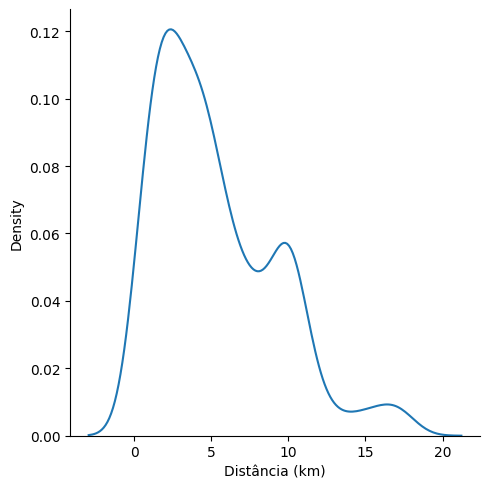

In [76]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.displot(data=df, x="Distância (km)", kind="kde")
plt.savefig('Distância.png')


O comportamento do gráfico demonstra assimetria à direita, mostrando maior frequência para distâncias entre 0-5km, uma frequência considerável até 10Km e uma quantidade bem menor de treinos entre 15-20Km. Algo esperado, visto que durante os treinos de corrida a maioria dos treinos permeiam distâncias menores. Em prol de evitar lesões, não é recomendável correr sempre ao máximo esforço.

<ipython-input-73-e8107faf69e1>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


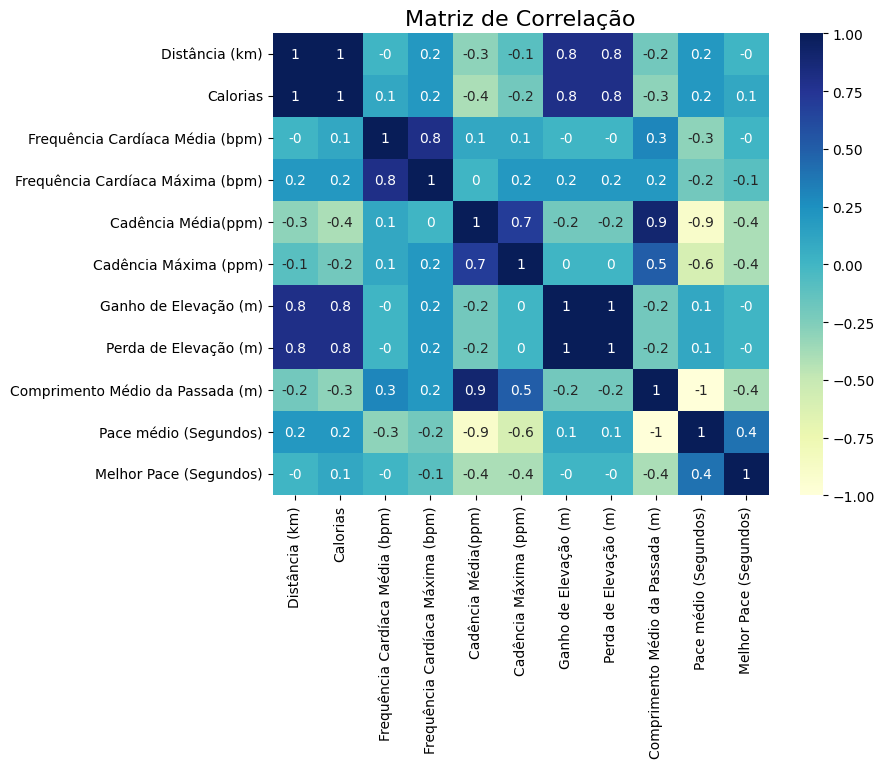

In [73]:
corr_matrix = df.corr()

rounded_corr_matrix = corr_matrix.round(1)

plt.figure(figsize=(8, 6))
ax = sns.heatmap(rounded_corr_matrix, annot=True, cmap="YlGnBu")
ax.set_title("Matriz de Correlação", fontsize=16)
plt.savefig('Matriz_de_Correlação.png')

plt.show()

Algumas correlações interessantes a se notar na matriz:
- Quando há ganho ou perda de elevação, há também aumento da distância. Isto provavelmente ocorre pois ele usualmente corre em terreno com importante variação de altitude, e a medida que avança isso acaba occorendo.
- É importante notar também que as variações em elevação e distância se correlacionaram positivamente com a perda de calorias. Ou seja, quanto mais realiza-se esforço em terrenos com diferentes altitudes, bem como maiores distâncias, maior a perda de calorias.
- Além disso, maior cadência média e maior comprimento médio da passada foram os fatores que influenciaram no desempenho (Diminuição do pace médio).

#####Evolução na corrida ao longo dos anos:

<ipython-input-74-970cfd77aa7d>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_sum_year = df.groupby('Ano').sum().reset_index()
<ipython-input-74-970cfd77aa7d>:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_mean_year = df.groupby('Ano').mean().reset_index()
<ipython-input-74-970cfd77aa7d>:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_mean_month = df[df['Ano'] == 2019].groupby('Mês').mean().reset_index()

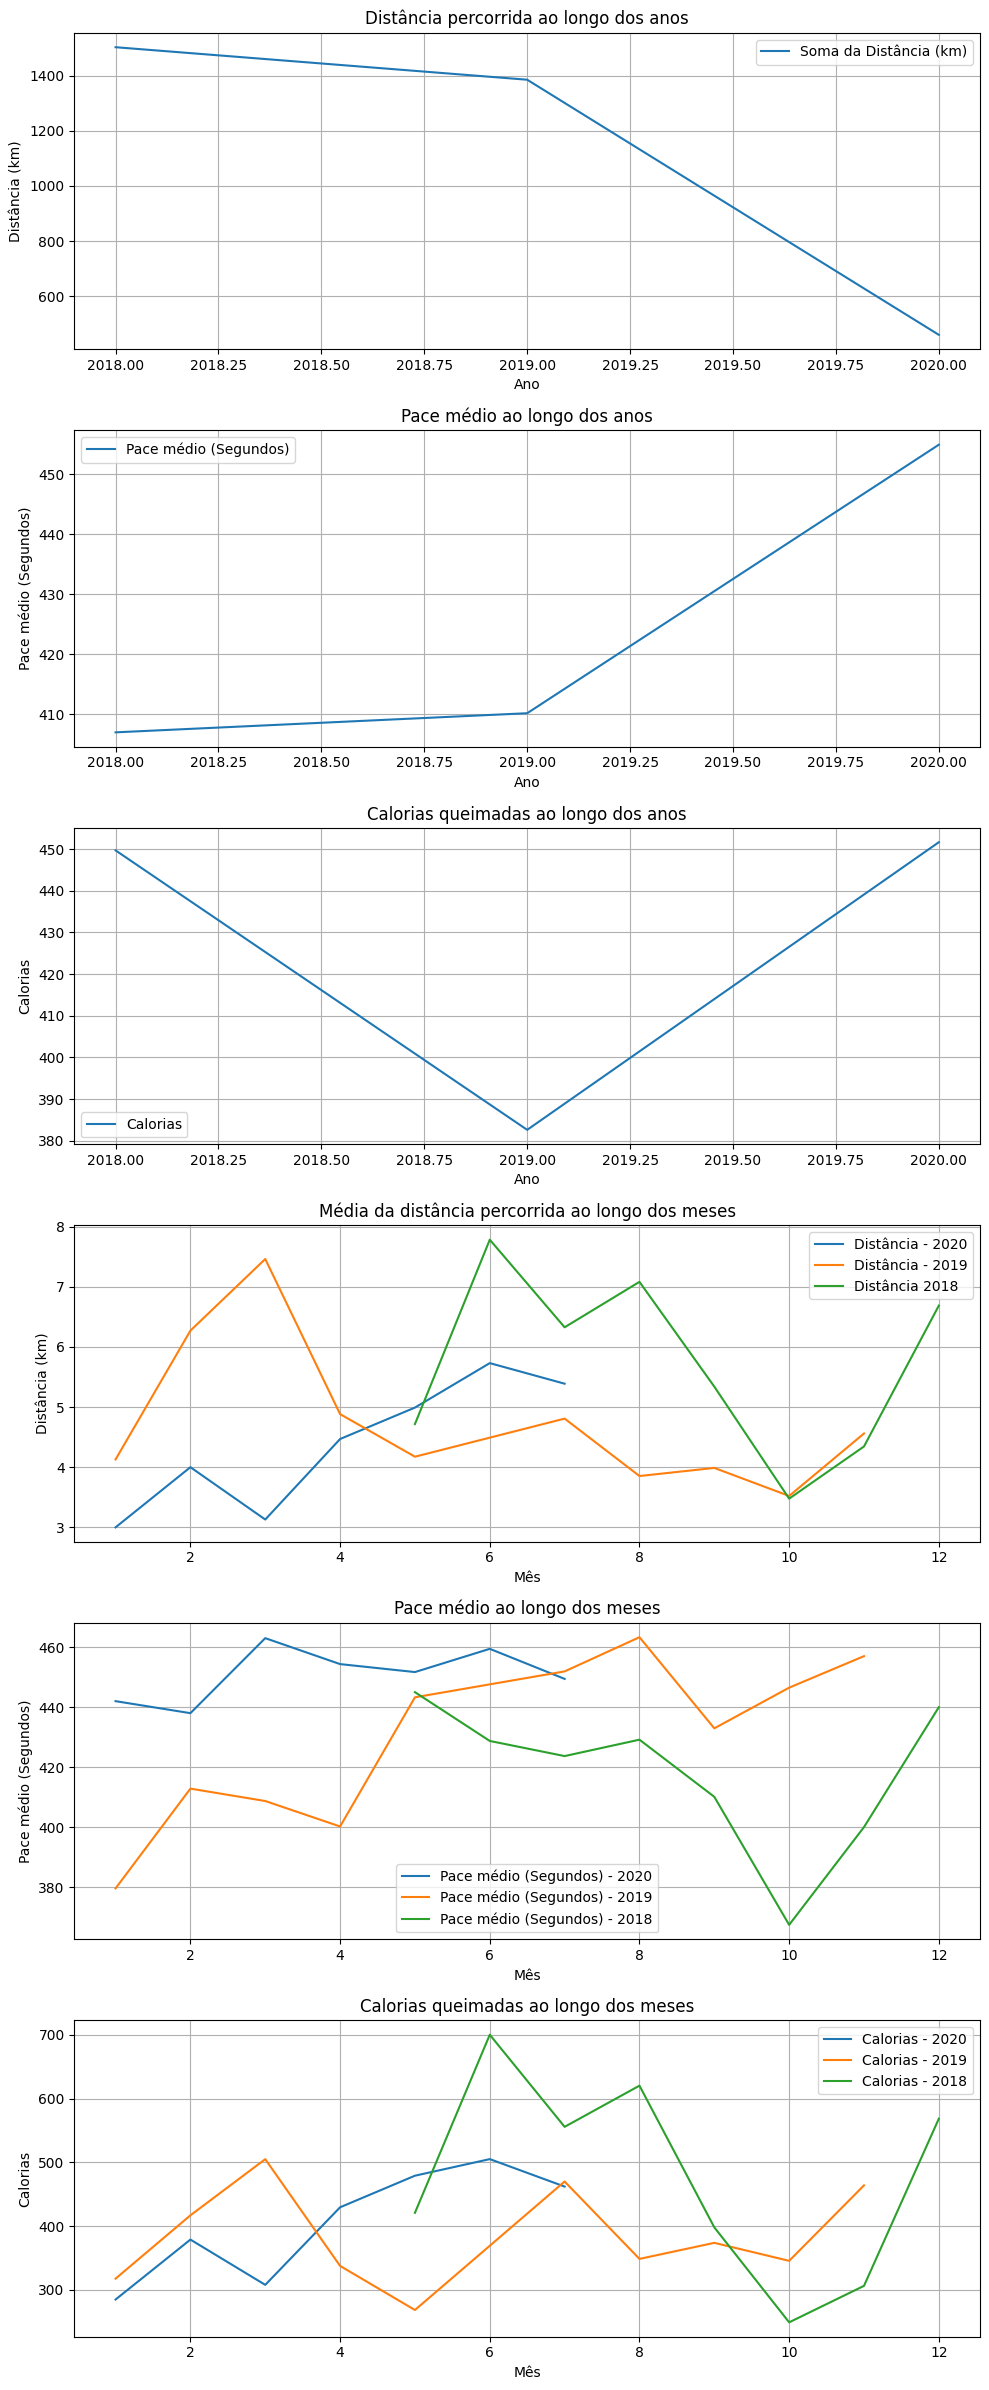

In [74]:


df['Ano'] = df['Data'].dt.year
df['Mês'] = df['Data'].dt.month

df_sum_year = df.groupby('Ano').sum().reset_index()
df_mean_year = df.groupby('Ano').mean().reset_index()
df_mean_month = df[df['Ano'] == 2019].groupby('Mês').mean().reset_index()
df_mean_month_2018 = df[df['Ano'] == 2018].groupby('Mês').mean().reset_index()
df_mean_month_2020 = df[df['Ano'] == 2020].groupby('Mês').mean().reset_index()

# Plotar os dados
fig, axs = plt.subplots(6, 1, figsize=(10, 24))

# Evolução da distância ao longo dos anos
axs[0].plot(df_sum_year['Ano'], df_sum_year['Distância (km)'], label='Soma da Distância (km)')
axs[0].set_xlabel('Ano')
axs[0].set_ylabel('Distância (km)')
axs[0].set_title('Distância percorrida ao longo dos anos')
axs[0].legend()
axs[0].grid(True)

# Evolução do pace médio ao longo dos anos
axs[1].plot(df_mean_year['Ano'], df_mean_year['Pace médio (Segundos)'], label='Pace médio (Segundos)')
axs[1].set_xlabel('Ano')
axs[1].set_ylabel('Pace médio (Segundos)')
axs[1].set_title('Pace médio ao longo dos anos')
axs[1].legend()
axs[1].grid(True)

# Evolução da queima de calorias ao longo dos anos
axs[2].plot(df_mean_year['Ano'], df_mean_year['Calorias'], label='Calorias')
axs[2].set_xlabel('Ano')
axs[2].set_ylabel('Calorias')
axs[2].set_title('Calorias queimadas ao longo dos anos')
axs[2].legend()
axs[2].grid(True)

# Evolução da distância ao longo dos meses
axs[3].plot(df_mean_month_2020['Mês'], df_mean_month_2020['Distância (km)'], label='Distância - 2020')
axs[3].plot(df_mean_month['Mês'], df_mean_month['Distância (km)'], label='Distância - 2019')
axs[3].plot(df_mean_month_2018['Mês'], df_mean_month_2018['Distância (km)'], label='Distância 2018')
axs[3].set_xlabel('Mês')
axs[3].set_ylabel('Distância (km)')
axs[3].set_title('Média da distância percorrida ao longo dos meses')
axs[3].legend()
axs[3].grid(True)

# Evolução do pace médio ao longo dos meses
axs[4].plot(df_mean_month_2020['Mês'], df_mean_month_2020['Pace médio (Segundos)'], label='Pace médio (Segundos) - 2020')
axs[4].plot(df_mean_month['Mês'], df_mean_month['Pace médio (Segundos)'], label='Pace médio (Segundos) - 2019')
axs[4].plot(df_mean_month_2018['Mês'], df_mean_month_2018['Pace médio (Segundos)'], label='Pace médio (Segundos) - 2018')
axs[4].set_xlabel('Mês')
axs[4].set_ylabel('Pace médio (Segundos)')
axs[4].set_title('Pace médio ao longo dos meses')
axs[4].legend()
axs[4].grid(True)

# Evolução da queima de calorias ao longo dos meses
axs[5].plot(df_mean_month_2020['Mês'], df_mean_month_2020['Calorias'], label='Calorias - 2020')
axs[5].plot(df_mean_month['Mês'], df_mean_month['Calorias'], label='Calorias - 2019')
axs[5].plot(df_mean_month_2018['Mês'], df_mean_month_2018['Calorias'], label='Calorias - 2018')
axs[5].set_xlabel('Mês')
axs[5].set_ylabel('Calorias')
axs[5].set_title('Calorias queimadas ao longo dos meses')
axs[5].legend()
axs[5].grid(True)


plt.tight_layout()
plt.show()

Algumas ideias podem ser tiradas destas visualizações, tais quais:

- A média de distância percorrida foi diminuindo ao longo dos anos.
- A média de pace aumentou, principalmente a partir de 2019.
- A média de calorias gastas vinha diminuindo mas aumentou, também a partir de 2019.
- A curva de distância percorrida em 2019 demonstrou um volume maior de treinos no começo do ano e diminuição ao fim, com uma tendência a aumentar. Em 2018, segue-se um padrão parecido, mostrando que provavelmente, os 2 períodos em que o atleta usualmente mais está ativo são no início e fim de ano.
- Em 2019, o pace médio também segue a mesma tendência de aumento. Uma hipótese para esses padrões seriam talvez uma maior empolgação no início do ano?
- Já em 2018, o pace médio segue um padrão diferente chegando a abaixar bastante no mês 10. Possívelmente poderia estar em treinamento para uma prova específica neste período.

#####Como vai esse coração?
Agora vamos buscar responder um dos questionamentos mais importantes dessa análise. Como a frequência cardíaca se adaptou ao longo do tempo?

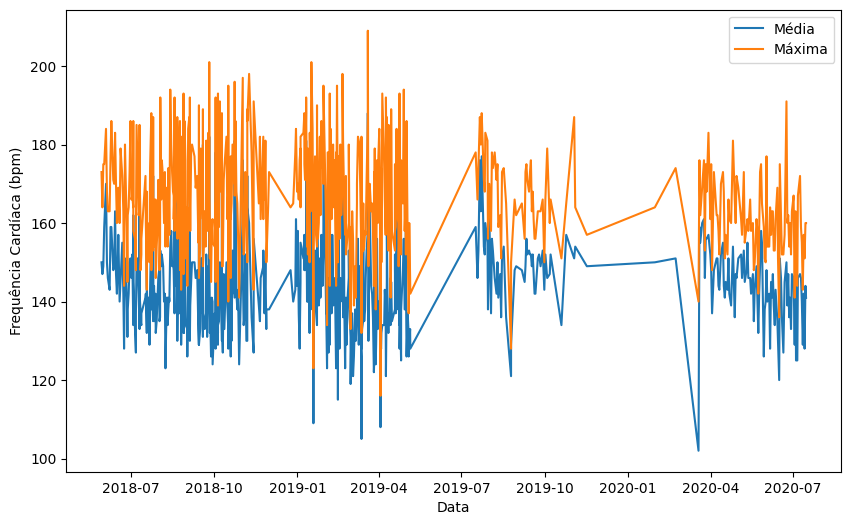

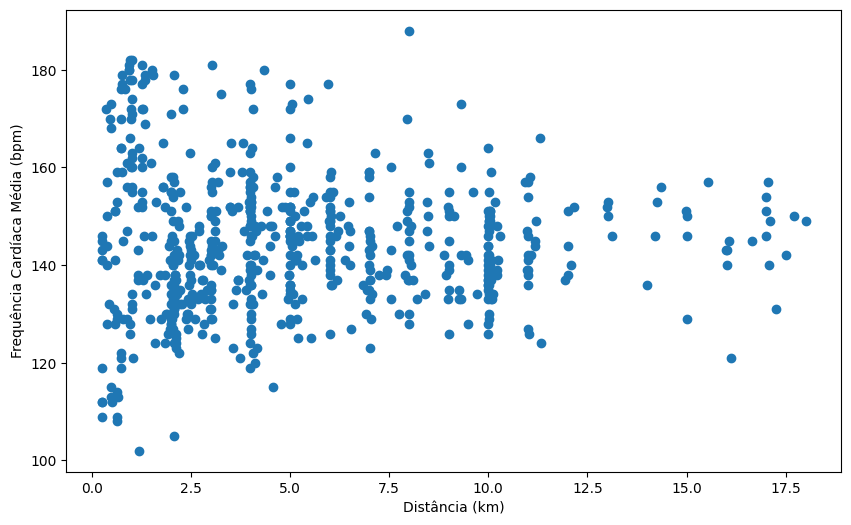

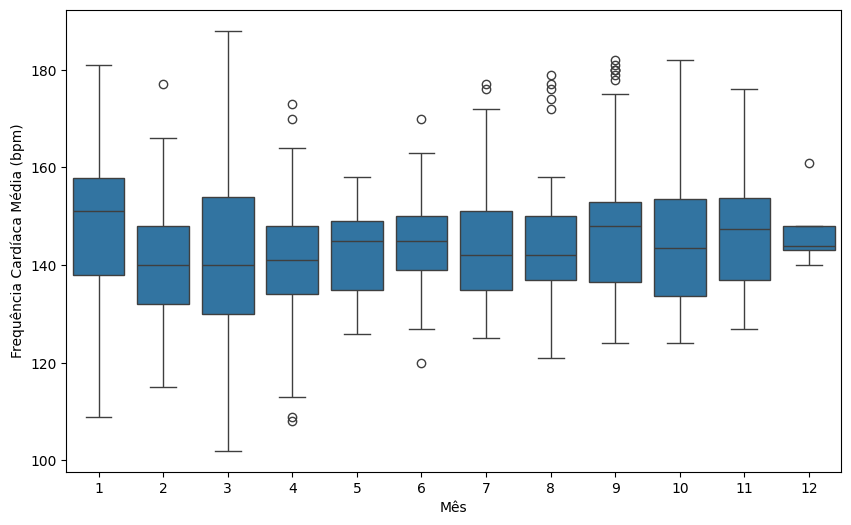

In [75]:
#Gráfico de linhas da Frequência Cardíaca Média e Máxima
plt.figure(figsize=(10,6))
plt.plot(df['Data'], df['Frequência Cardíaca Média (bpm)'], label='Média')
plt.plot(df['Data'], df['Frequência Cardíaca Máxima (bpm)'], label='Máxima')
plt.xlabel('Data')
plt.ylabel('Frequência Cardíaca (bpm)')
plt.legend()
plt.show()

#Gráfico de dispersão da Frequência Cardíaca Média vs. Distância
plt.figure(figsize=(10,6))
plt.scatter(df['Distância (km)'], df['Frequência Cardíaca Média (bpm)'])
plt.xlabel('Distância (km)')
plt.ylabel('Frequência Cardíaca Média (bpm)')
plt.savefig('dispersão_frequencia_cardiaca.png')
plt.show()

#Gráfico de Boxplot da Frequência Cardíaca Média por Mês
plt.figure(figsize=(10,6))
sns.boxplot(x=df['Mês'], y=df['Frequência Cardíaca Média (bpm)'])
plt.xlabel('Mês')
plt.ylabel('Frequência Cardíaca Média (bpm)')
plt.savefig('boxplot_frequencia_cardiaca.png')

plt.show()

Z1: 0-141 BPM

Z2: 141-153 BPM

Z3: 153-161 BPM

Z4: 161-172 BPM

Z5: 172-177 BPM

Z6: 177-182 BPM

Z7: 182-255 BPM

Visto que não foi disponibilizada a idade do corredor.Para as análises seguintes, considerei a generalização das zonas cardíacas acima. Seguem:
- Podemos notar que os meses em que mais comumente se atingiu algo próximo da zona 7 (Máximo esforço) foram os meses 1,3 e 10 evidenciados no boxplot. Também seguindo aquele padrão já observado, em que a intensidade das atividades aumentam no início e fim do ano.
- No gráfico de dispersão, visualizamos que a maior parte das atividades estão entre a zona 2 e 3. Há ainda alguns treinos em zona 5 e 6 com a distância entre 0-2.5km, o que poderiam representar treinos em pace mais baixo, com maior intensidade e menor distância.